In [ ]:
import pandas as pd

epa_df = pd.read_csv('data/epa_us.csv')
srl_df = pd.read_csv('srl_output_sara_little_princess.csv')
epa_imputed_df = pd.read_csv('imputed_sara_little_princess.csv')
epa_imputed_df = epa_imputed_df.drop(epa_imputed_df.columns[[0, 1]], axis=1)

epa_imputed_df = df_cleaned = epa_imputed_df.drop_duplicates(subset='verb', keep='first')

In [9]:
agent_df = srl_df[srl_df['agent'] == 'protag']
columns = ['sentence_ID', 'verb', 'E', 'P', 'A']
filter_results_df = pd.DataFrame(columns=columns)

for index, row in agent_df.iterrows():
    if row['verb'] in epa_df['term'].values:
       result_row = epa_df[epa_df['term'] == row['verb']]
       new_row = pd.DataFrame({'sentence_ID': row['sentence_ID'], 'verb': row['verb'], 'E' : result_row['E'], 'P' : result_row['P'], 'A' : result_row['A']})
       filter_results_df = pd.concat([filter_results_df, new_row], ignore_index=True)
    elif row['verb'] in epa_imputed_df['verb'].values:
        result_row = epa_imputed_df[epa_imputed_df['verb'] == row['verb']]
        new_row = pd.DataFrame({'sentence_ID': row['sentence_ID'], 'verb': row['verb'], 'E' : result_row['E'], 'P' : result_row['P'], 'A' : result_row['A']})
        filter_results_df = pd.concat([filter_results_df, new_row], ignore_index=True)

/var/folders/xy/98bsg3ss09d55jncnlw4n2180000gn/T/ipykernel_32057/3625803885.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  filter_results_df = pd.concat([filter_results_df, new_row], ignore_index=True)


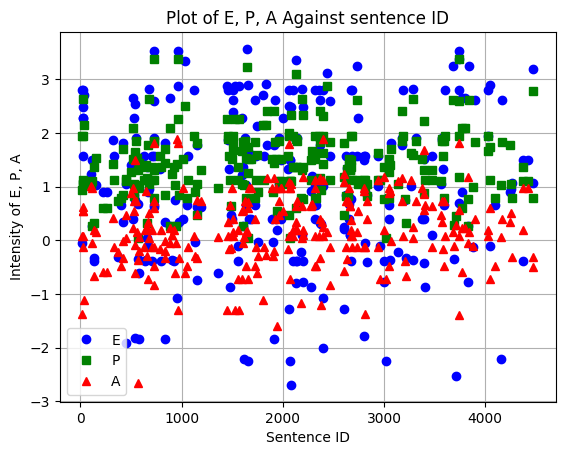

In [10]:
import matplotlib.pyplot as plt

 # Plot each y value with a different color
plt.plot(filter_results_df['sentence_ID'], filter_results_df['E'], linestyle='None', marker='o', color='blue', label='E')
plt.plot(filter_results_df['sentence_ID'], filter_results_df['P'], linestyle='None', marker='s', color='green', label='P')
plt.plot(filter_results_df['sentence_ID'], filter_results_df['A'], linestyle='None', marker='^', color='red', label='A')

# Adding title and labels
plt.title('Plot of E, P, A Against sentence ID')
plt.xlabel('Sentence ID')
plt.ylabel('Intensity of E, P, A')
plt.legend()  # Show legend
plt.grid()    # Optional: Show grid
plt.show()

In [10]:
filtered_df = epa_df[epa_df['term'].isin(srl_df['verb'])]

non_overlapping_df = srl_df[~srl_df['verb'].isin(epa_df['term'])]
non_overlapping_df.to_csv('non_retrievable_sara_little_princess.csv', index=False)